<a href="https://colab.research.google.com/github/rim-yu/SGU_ANT6320_Assignment/blob/master/Exercise_03_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline 
# Ipython에서 제공하는 Rich output에 대한 표현 방식.
# figure, sound, animation과 같은 결과물들을 Rich output이라고 한다. 
# notebook을 실행한 browser에서 바로 Rich output을 볼 수 있게 해주는 command. 
from fastai.basics import * # fastai.basics의 모든 module을 import한다. 

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [0]:
n=100 # 정수 100을 n에 대입한다. 

In [0]:
x = torch.ones(n,2) # 주어진 사이즈(n*2, matrix)의 1로 이루어진 tensor을 생성하는 command. pytorch의 'tensor 자료형'은 numpy의 array와 유사한 자료형이다. 
x[:,0].uniform_(-1.,1) # x의 첫 번째 열에 -1부터 1까지 균일한 분포를 갖는 숫자를 채워넣는다. 
x[:5] # x의 5행까지 보여준다.  

# y = ax + b를 보여주기 위함이고, 그래서 두 번째 열의 값이 모두 1인 것이었다. 

tensor([[-0.3114,  1.0000],
        [ 0.8366,  1.0000],
        [ 0.7795,  1.0000],
        [-0.0514,  1.0000],
        [ 0.0687,  1.0000]])

In [0]:
a = tensor(3.,2); a 
# 3과 2로 이루어진 tensor을 생성.(float형)
# tensor는 배열을 의미한다.  
# 계수가 3과 2임. 

tensor([3., 2.])

In [0]:
x@a # product를 의미함. 

tensor([ 1.0658,  4.5099,  4.3386,  1.8459,  2.2062,  0.6461, -0.9205,  0.6775,
         4.2653,  4.7185, -0.3400,  2.8697, -0.2130, -0.9065, -0.2977,  1.2094,
         3.4384,  4.7321,  2.2840,  0.8166,  1.8739,  0.8805,  1.3957,  1.2184,
         3.0739,  1.0009,  1.9681,  4.0218,  2.6968, -0.6737,  0.4565,  4.6347,
         0.0542,  3.5187,  3.2578, -0.8879,  3.4382,  3.0782, -0.7760,  3.8058,
         1.4570,  1.6548,  1.2830,  1.2228,  3.3843,  0.5688,  0.7825,  2.9645,
         3.0370,  0.2818,  1.6926,  1.5908,  2.0869, -0.8151,  4.2266,  1.1080,
         0.2205,  0.8879,  4.0868,  4.9003,  2.4637,  2.0056,  0.4531, -0.3325,
         3.8303,  4.6366,  0.0467,  4.9052,  3.6579,  0.5983, -0.4589,  1.1187,
         2.6052,  2.9781,  0.7543,  4.4555, -0.1137, -0.4314,  2.2665,  0.5417,
         0.1785,  3.3983,  2.5857,  1.1289,  0.8356,  2.8339,  2.8639,  0.2468,
         0.3777, -0.4200,  3.6455,  0.4835,  3.9792,  1.3237,  0.5364,  0.6112,
         2.7855,  4.4218,  4.2403,  4.65

In [0]:
torch.rand(n)

tensor([0.4154, 0.8343, 0.0802, 0.9067, 0.8226, 0.1788, 0.8083, 0.9585, 0.4714,
        0.1986, 0.4987, 0.8376, 0.5282, 0.6380, 0.5758, 0.2054, 0.5901, 0.2869,
        0.1007, 0.6683, 0.1314, 0.5801, 0.5892, 0.0864, 0.3749, 0.0774, 0.6144,
        0.6718, 0.9731, 0.5763, 0.2001, 0.8600, 0.3631, 0.4420, 0.1075, 0.5479,
        0.8734, 0.8122, 0.5885, 0.3549, 0.1298, 0.2255, 0.7994, 0.8447, 0.9749,
        0.0011, 0.8718, 0.4486, 0.6981, 0.0588, 0.2706, 0.3359, 0.8345, 0.1584,
        0.8969, 0.8541, 0.6326, 0.6979, 0.5714, 0.2878, 0.4635, 0.4004, 0.9793,
        0.2329, 0.7487, 0.7010, 0.4939, 0.9027, 0.0451, 0.2507, 0.8072, 0.6382,
        0.6028, 0.1135, 0.7221, 0.8565, 0.1781, 0.5520, 0.3751, 0.4266, 0.2568,
        0.6005, 0.3265, 0.9673, 0.2262, 0.1298, 0.2001, 0.3471, 0.5904, 0.3340,
        0.0416, 0.7939, 0.4382, 0.3480, 0.8066, 0.9746, 0.7704, 0.5172, 0.9353,
        0.4533])

In [0]:
y = x@a + torch.rand(n) # @는 a matrix multipication이다. 
# torch.rand(n)은 0부터 1까지 random한 값 n개를 가진 tensor을 생성한다. 
# y의 size는 (n,)이다. 
# broadcasting을 통해 이 연산이 가능. 각 자릿수끼리 곱해서 더한 값을 원소로 가진다.  

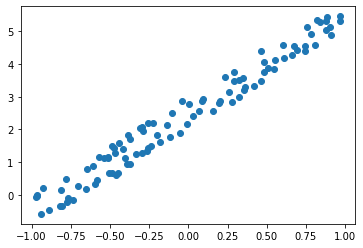

In [0]:
plt.scatter(x[:,0], y); # x의 첫 번째 열의 값(-1부터 1까지의 uniform한 값)이 증가할수록 y의 원소값은 증가한다. 

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean() # y_hat은 y의 예측값. mean squared error(평균 제곱근 오차)를 구하는 함수(mse())를 생성한다. 
#  Can only calculate the mean of floating types
# 점과 직선 사이의 오차를 최소화하는 것이 오류를 최소화하는 것임.  
# 회귀 문제라고 함. 

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [0]:
a = tensor(-1.,1) # a를 tensor(3,2)에서 tensor(-1,1)로 바꿈. a는 가중치 행렬을 의미.  

In [0]:
y_hat = x@a # 새로운 a로 y의 예측값을 구한다. 
mse(y_hat, y) # 새로운 a로 구한 y의 예측값으로 mean squared error를 구한다. 

tensor(6.8777)

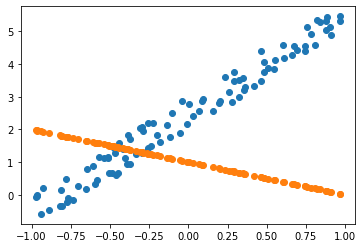

In [0]:
plt.scatter(x[:,0],y) # original value.
plt.scatter(x[:,0],y_hat); # prediction.

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [0]:
a = nn.Parameter(a); a 
# tensor의 한 종류로, module에 속성으로 할당될 때 자동으로 매개변수로 등록된다.(?)
# requires_grad=True를 설정하여 연산을 기록한다. 

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

tutorial : https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#gradients

What is the use of **torch.no_grad** in pytorch? : https://datascience.stackexchange.com/questions/32651/what-is-the-use-of-torch-no-grad-in-pytorch

In [0]:
def update():
    y_hat = x@a # y의 예측값을 구한다. 
    loss = mse(y, y_hat) # y와 y_hat의 mean squared error를 구해 loss에 저장한다. 
    if t % 10 == 0: print(loss) # 10 times마다 loss를 print한다. 
    loss.backward() 
    # 전체 graph가 loss에 대해 미분되며, requires_grad=True인 모든 tensor는 gradient가 누적된 .grad tensor을 갖게 된다. 
    # gradient를 계산한다. 파이토치에서 gradient 계산은 backward()라는 method를 통해 수행한다.

    # loss.backward()의 파생물은 .grad 속성에 저장된다.  
    with torch.no_grad(): # no_grad()는 일시적으로 requires_grad=False로 set한다. 
    # with 구문으로 context manager object를 사용하면, 함수 시작 전후 특정 구문을 반드시 실행할 때, try - finally 구문을 사용하지 않고 관리하기 좋은 코드를 만들 수 있다. 
        a.sub_(lr * a.grad) # a(t-1) = a(t) - lr * a(t).grad 
        a.grad.zero_() # parameter update에 gradient를 사용하고 나면 항상 0으로 만들어야한다.
        # 이 기능을 사용하면 SGD 업데이트를 할 때 gradient 계산을 해제할 수 있음. 

In [0]:
lr = 1e-1 # learning rate
for t in range(100): update() # 100times동안 update() 함수 실행. 10번마다 loss를 출력한다. 

tensor(6.8777, grad_fn=<MeanBackward0>)
tensor(1.5191, grad_fn=<MeanBackward0>)
tensor(0.4744, grad_fn=<MeanBackward0>)
tensor(0.1992, grad_fn=<MeanBackward0>)
tensor(0.1255, grad_fn=<MeanBackward0>)
tensor(0.1058, grad_fn=<MeanBackward0>)
tensor(0.1005, grad_fn=<MeanBackward0>)
tensor(0.0991, grad_fn=<MeanBackward0>)
tensor(0.0987, grad_fn=<MeanBackward0>)
tensor(0.0986, grad_fn=<MeanBackward0>)


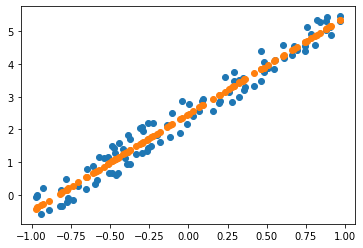

In [0]:
plt.scatter(x[:,0],y)
#plt.scatter(x[:,0], x@a);
with torch.no_grad():
    plt.scatter(x[:,0], x@a);

## Animate it!

In [0]:
from matplotlib import animation, rc # as plt
rc('animation', html='jshtml') # 원래 다른 command를 통해 plug in install이 필요하나, html을 html5에서 jshtml로 바꾸어 그럴 필요가 없어졌다. 

In [0]:
a = nn.Parameter(tensor(-1.,1))

#fig = plt.figure()
#plt.scatter(x[:,0], y, c='orange') 
#line, = plt.plot(x[:,0], x@a)
#plt.close()

#def animate(i):
#    update()
#    line.set_ydata(x@a)
#    return line,

#animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20) 

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
with torch.no_grad():
    line, = plt.plot(x[:,0], x@a)
plt.close() # by itself closes the current figure. 

def animate(i):
    update()
    with torch.no_grad():
        line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20) 
# np.arange(0, 100) : array([0, 1, ... 98, 99])
# interval : animation의 reset 간격. 이 값이 커지면 animation이 느려진다. 

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.